I mentioned partial dependence plots (PDPs) [before](https://yigitasik.github.io/posts/Interpretablog%20-%20Partial%20Dependence/) and how things get odd when the predictors are correlated. While varying one variable, we might be creating data points that are very unlikely or even impossible (i.e., we don't take joint distribution into account).

First solution that comes to mind is to average over conditional distribution. However, then the effect is the combination of variables. What we want is the isolated effect.

There comes the accumulated local effects (ALEs): Taking the difference between predictions in a small window, hence canceling the other variables.

Let's exemplify the whole thing to make it more concrete.

In [4]:
df = df[['head_l', 'total_l', 'tail_l']]
df.head()

,head_l,total_l,tail_l
0,94.1,89.0,36.0
1,92.5,91.5,36.5
2,94.0,95.5,39.0
3,93.2,92.0,38.0
4,91.5,85.5,36.0


Text(0, 0.5, 'Total length')

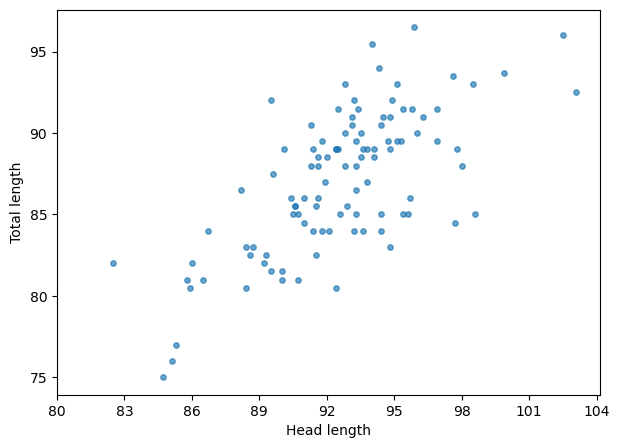

In [6]:
plt.figure(figsize=(7, 5))

plt.scatter(df['head_l'], df['total_l'], alpha=.67, s=15)

plt.xticks(np.arange(80, 105, 3))

plt.xlabel('Head length')
plt.ylabel('Total length')

Within the whole range, the correlation is very obvious. However, if we zoom into any small window...

Text(0, 0.5, 'total_l')

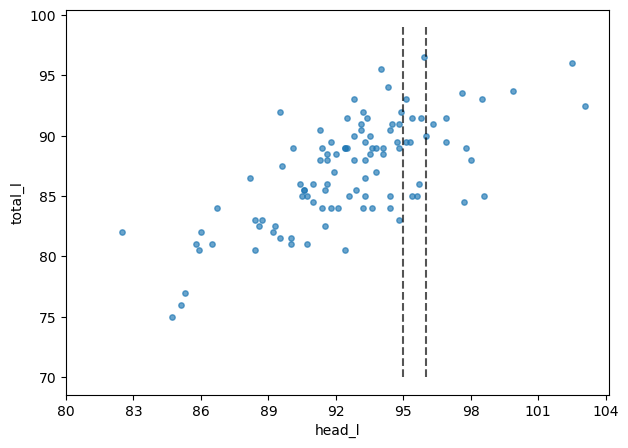

In [7]:
plt.figure(figsize=(7, 5))

plt.scatter(df['head_l'], df['total_l'], alpha=.67, s=15)
plt.plot(np.repeat(95, 30), np.arange(70, 100, 1), ls='--', color='black', alpha=.67)
plt.plot(np.repeat(96, 30), np.arange(70, 100, 1), ls='--', color='black', alpha=.67)

plt.xticks(np.arange(80, 105, 3))

plt.xlabel('head_l')
plt.ylabel('total_l')

(95.0, 96.0)

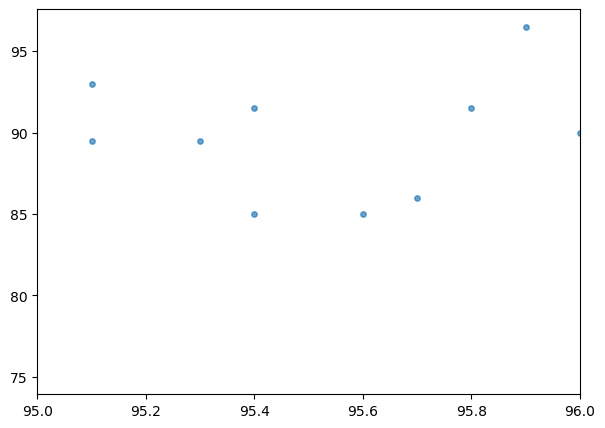

In [8]:
plt.figure(figsize=(7, 5))

plt.scatter(df['head_l'], df['total_l'], alpha=.67, s=15)

plt.xlim(95, 96)

Now, not so much. That's what we are going to take advantage of.

In [9]:
X = df[['head_l', 'total_l']]
y = df['tail_l']

In [11]:
ale = ali.ALE(rf.predict, feature_names=X.columns, target_names=['tail_l'])
exp = ale.explain(X.to_numpy())

array([[<Axes: xlabel='head_l', ylabel='ALE'>,
        <Axes: xlabel='total_l', ylabel='ALE'>]], dtype=object)

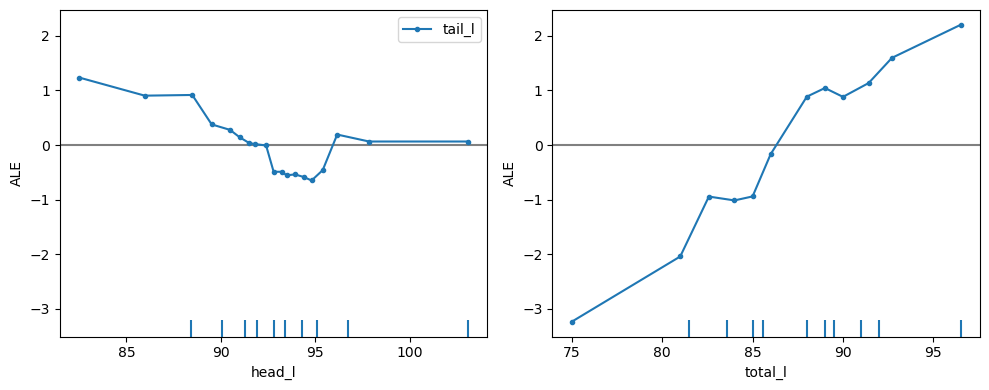

In [12]:
ali.plot_ale(
    exp, 
    features=[0,1], 
    fig_kw={'figwidth':10, 'figheight': 4}
)

What those plots tell us?

Well, it seems like total_l has larger effect compared to head_l, as the total_l increase so does the height prediction of the model.

The plots are centered, which changes the interpretation -- makes it relative to the average.

For example, total_l of 75 decreases the predicted tail_l by 3 relative to the average prediction.

I hope you enjoyed this one. If you did, don't forget to follow me on LinkedIn.

Until next time, take care!